In [1]:
## Team Analysis
#Phase-wise team performance across matches.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    t.team_name,
    AVG(mi.powerplay_runs) AS powerplay,
    AVG(mi.middle_runs) AS middle,
    AVG(mi.death_runs) AS death
FROM match_innings mi
JOIN team t ON mi.team_id = t.team_id
GROUP BY t.team_name
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_3492\3051806356.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


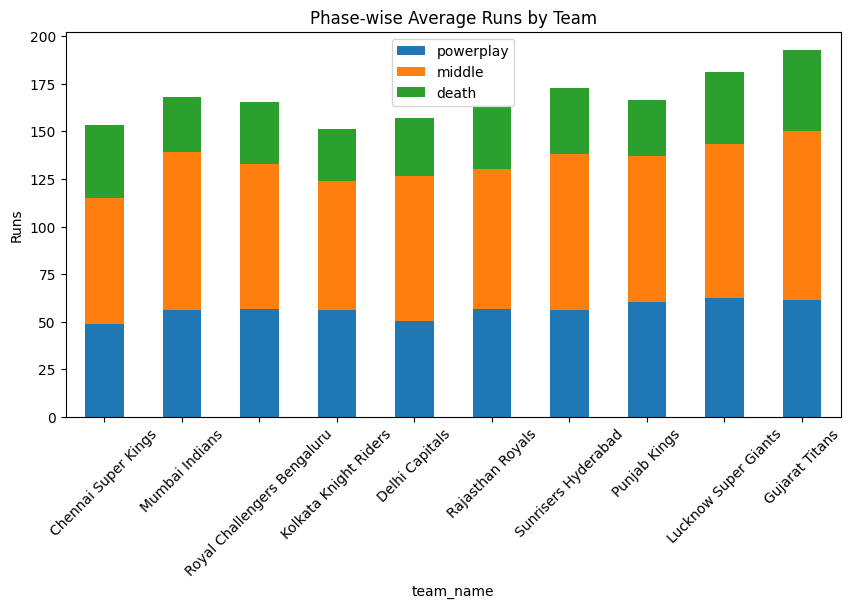

In [3]:
df.set_index("team_name").plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Phase-wise Average Runs by Team")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()


In [4]:
query = """
SELECT
    t.team_name,
    AVG(mi.powerplay_runs) AS avg_powerplay,
    AVG(mi.middle_runs) AS avg_middle,
    AVG(mi.death_runs) AS avg_death
FROM match_innings mi
JOIN team t ON mi.team_id = t.team_id
GROUP BY t.team_name
ORDER BY t.team_name
"""
df = pd.read_sql(query, conn)



C:\Users\hp\AppData\Local\Temp\ipykernel_3492\204132736.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
query = """
SELECT 
    CASE 
        WHEN over_number BETWEEN 1 AND 20 THEN over_number - 1
        ELSE over_number
    END AS over_index,
    AVG(runs) AS avg_runs
FROM over_summary
GROUP BY over_index
ORDER BY over_index
"""
df = pd.read_sql(query, conn)

df["over"] = df["over_index"] + 1
df = df[["over", "avg_runs"]]

df


C:\Users\hp\AppData\Local\Temp\ipykernel_3492\3675605780.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,over,avg_runs
0,1,8.2513
1,2,10.1667
2,3,10.2083
3,4,9.9688
4,5,10.3750
5,6,8.6354
6,7,8.0521
7,8,7.9375
8,9,8.9167
9,10,9.0625


C:\Users\hp\AppData\Local\Temp\ipykernel_3492\167506525.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


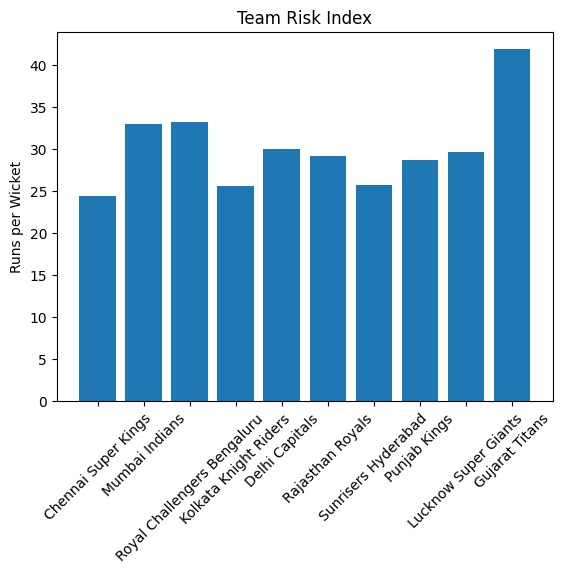

In [6]:
query = """
SELECT
    t.team_name,
    SUM(mi.total_runs) / SUM(mi.total_wickets) AS runs_per_wicket
FROM match_innings mi
JOIN team t ON mi.team_id = t.team_id
GROUP BY t.team_name
"""
df = pd.read_sql(query, conn)

plt.figure()
plt.bar(df["team_name"], df["runs_per_wicket"])
plt.xticks(rotation=45)
plt.ylabel("Runs per Wicket")
plt.title("Team Risk Index")
plt.show()
